# Medicare Trend Analysis

#### Medicare Enrollment by Contract, Plan and State

Author: Miguel Santana

#### Project Methodology
Medicare is a form of health care available in the United States. As a government program, Medicare can become complicated as private insurance companies enter markets to offer additional coverage in a variety of ways. This project will observe trends in the health care industry with respect to private insurance companies and market trends as reported by CMS.gov for July of 2021.

#### Data and Analytical Structure

The dataset can be found [here.](https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/MCRAdvPartDEnrolData/Monthly-Enrollment-by-Contract-Plan-State-County) The project analysis will follow the OSEMN framework: Obtain, Scrub, Explore, Model and Interpret.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns',50)

# Obtain | Dataset

In [2]:
df = pd.read_csv('CPSC_Contract_Info_2021_07.csv',encoding='latin-1')
df2 = pd.read_csv('CPSC_Enrollment_Info_2021_07.csv',encoding='latin-1')

In [3]:
display(df.shape)
df.head(2)

(7581, 12)

,Contract ID,Plan ID,Organization Type,Plan Type,Offers Part D,SNP Plan,EGHP,Organization Name,Organization Marketing Name,Plan Name,Parent Organization,Contract Effective Date
0,90091,NaN,HCPP - 1833 Cost,HCPP - 1833 Cost,No,No,No,UNITED MINE WORKERS OF AMERICA HLTH & RETIREMENT,United Mine Workers of America Health & Retire...,NaN,UMWA Health and Retirement Funds,02/01/1974
1,E0654,801.0,Employer/Union Only Direct Contract PDP,Employer/Union Only Direct Contract PDP,Yes,No,Yes,IBT VOLUNTARY EMPLOYEE BENEFITS TRUST,TEAMStar Medicare Part D Prescription Drug Pro...,IBT Voluntary Employee Benefits Trust (Employe...,IBT Voluntary Employee Benefits Trust,01/01/2007


In [4]:
display(df2.shape)
df2.head(2)

(3340582, 7)

,Contract Number,Plan ID,SSA State County Code,FIPS State County Code,State,County,Enrollment
0,E0654,801,2275,NaN,NaN,NaN,*
1,E0654,801,2198,NaN,NaN,NaN,*


# Scrub | Data Cleaning
Our analysis will focus on insurance carriers and the presence they have per state.

In [5]:
df = df[['Contract ID','Plan ID','Plan Type','Offers Part D','SNP Plan',
         'Organization Marketing Name','Plan Name','Parent Organization']]

df2 = df2[['Contract Number','Plan ID','State','Enrollment']]

#### an asterisk is used to represent less than 10 enrollments in a specific area. While this update may inflate the numbers, a value of 7 will replace asterisk values prior to grouping. 

In [6]:
df2['Enrollment'] = df2['Enrollment'].replace('*','5').astype(int)

In [7]:
df2 = df2.groupby(by=['Contract Number','Plan ID','State']).sum().reset_index()

In [8]:
# rename columns to merge tables
df.rename(columns={'Contract ID':'Contract','Plan ID':'Plan'},inplace=True)
df2.rename(columns={'Contract Number':'Contract','Plan ID':'Plan'},inplace=True)

#### Null Values

In [9]:
# null values
display(df.isnull().sum())
df2.isnull().sum()

Contract                       0
Plan                           8
Plan Type                      0
Offers Part D                  0
SNP Plan                       0
Organization Marketing Name    0
Plan Name                      8
Parent Organization            0
dtype: int64

Contract      0
Plan          0
State         0
Enrollment    0
dtype: int64

In [10]:
df = df.dropna()
df['Plan'] = df['Plan'].astype(float).astype(int)

#### Merge Tables

In [11]:
dff = pd.merge(df2,df,how='outer',on=['Contract','Plan'])

In [12]:
display(dff.shape)
dff.head(1)

(101016, 10)

,Contract,Plan,State,Enrollment,Plan Type,Offers Part D,SNP Plan,Organization Marketing Name,Plan Name,Parent Organization
0,E0654,801,AK,420,Employer/Union Only Direct Contract PDP,Yes,No,TEAMStar Medicare Part D Prescription Drug Pro...,IBT Voluntary Employee Benefits Trust (Employe...,IBT Voluntary Employee Benefits Trust


# Exploratory Data Analysis
## Most Populous Medicare Enrollment States (July 2021)

In [13]:
ten = dff.groupby(by='State')['Enrollment'].sum().sort_values(ascending=False)[:10].to_frame().reset_index()

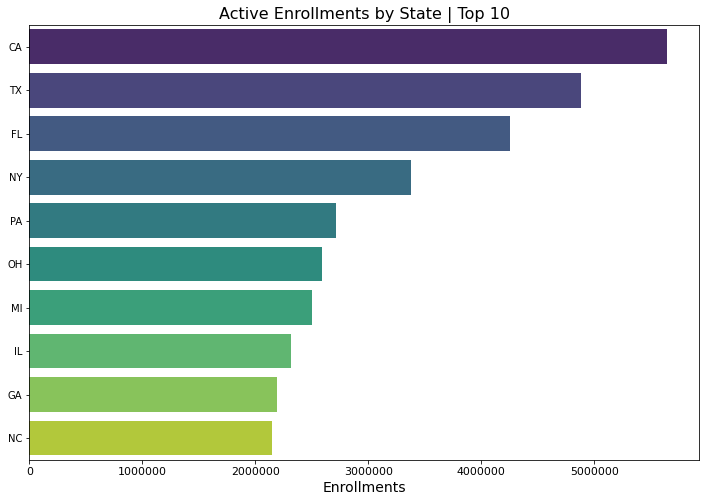

In [35]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(data=ten,x='Enrollment',y='State',palette='viridis');
plt.xticks(rotation=0,horizontalalignment='center',fontsize=11);
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.xlabel(xlabel='Enrollments',fontsize=14)
plt.ylabel(ylabel='')
plt.title(label='Active Enrollments by State | Top 10',fontsize=16);
# fig.savefig('enrollmentsbystate.jpg',dpi=200,bbox_inches='tight')

## Most Medicare Enrollments Overall (July 2021)

In [15]:
tenco = dff.groupby(by='Parent Organization')['Enrollment'].sum().sort_values(ascending=False)[:10].to_frame().reset_index()

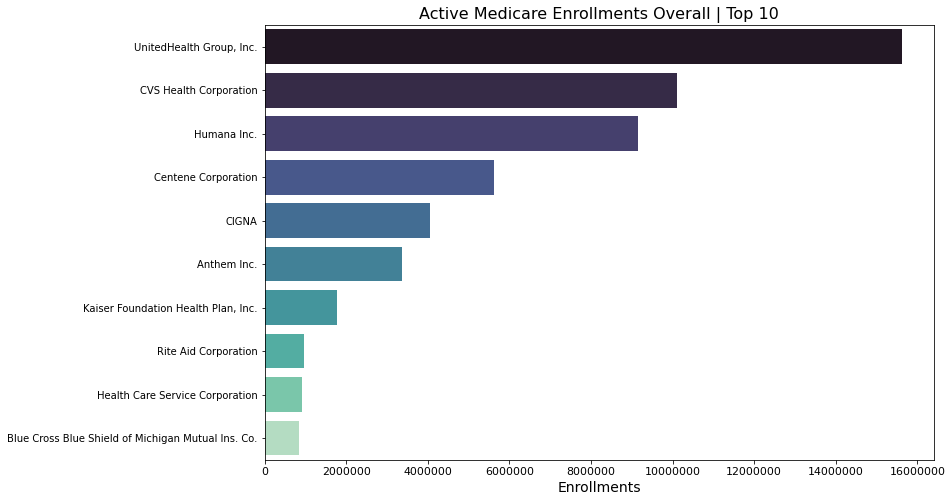

In [36]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(data=tenco,x='Enrollment',y='Parent Organization',palette='mako');
plt.xticks(rotation=0,horizontalalignment='center',fontsize=11);
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.xlabel(xlabel='Enrollments',fontsize=14)
plt.ylabel(ylabel='')
plt.title(label='Active Medicare Enrollments Overall | Top 10',fontsize=16);
# fig.savefig('enrollmentsbycarrier.jpg',dpi=200,bbox_inches='tight')

#### Top 5 Carriers Per State / Territory

In [17]:
states = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 
          'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 
          'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 
          'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 
          'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY', 'AS', 'MP']

statelist = []
for state in states:
    extralist = dff[dff['State'] == state].groupby(by='Parent Organization')['Enrollment'].sum().sort_values(ascending=False).reset_index()[:5].values.tolist()
    extralist.insert(0,state)
    statelist.append(extralist)

In [18]:
df5 = pd.DataFrame(statelist)
df5.rename(columns={0:'State'},inplace=True)

In [19]:
# # replacing preparer values with names
# dictvals = {'[':'',']':'','.':''}


# prepcols = [1,2,3,4,5]
# for col in prepcols:
#     df5[col] = df5[col].replace(dictvals)#.fillna()

In [22]:
# # exporting for Tableau Public
# df5.to_csv('top5bystate.csv')

In [34]:
%%HTML
<div class='tableauPlaceholder' id='viz1626726797393' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Me&#47;MedicareEnrollmentbyParentCompany2021&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='views&#47;MedicareEnrollmentbyParentCompany2021&#47;Sheet1?:language=en-US&amp;:embed=true&amp;publish=yes' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Me&#47;MedicareEnrollmentbyParentCompany2021&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1626726797393');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

# Future Work
Future work should include a deeper analysis into various products including Medicare Advantage, Prescription Drug plans and the various benefits that each plan offers. It's important to note that Medicare Supplement products are not included in this data exploration due to the fact that companies don't report publicly on these products. 

For any additional questions, please reach out via email at santana2.miguel@gmail.com or on [LinkedIn.](https://www.linkedin.com/in/miguel-angel-santana-ii-mba-51467276/)